<a href="https://colab.research.google.com/github/tarun7explorer/data_analysis_projects/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Working on a real project using Python on COVID-19** **Dataset**

I took a small dataset of Covid-19 for undarstanding & analysis purpose.

The data is avaliable as a CSV File, downloaded from Kaggle.
The data used here is till 29th April,2020 & has records as on 29-April-2020.

In [27]:
import pandas as pd

In [28]:
data = pd.read_csv('/content/Covid_19_data.csv')

In [29]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [30]:
data.shape

(321, 6)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [32]:
data.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [33]:
# counting nullvalues
data.count()

,0
Date,321
State,140
Region,321
Confirmed,321
Deaths,321
Recovered,321


In [34]:
data.isnull().sum()

,0
Date,0
State,181
Region,0
Confirmed,0
Deaths,0
Recovered,0


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


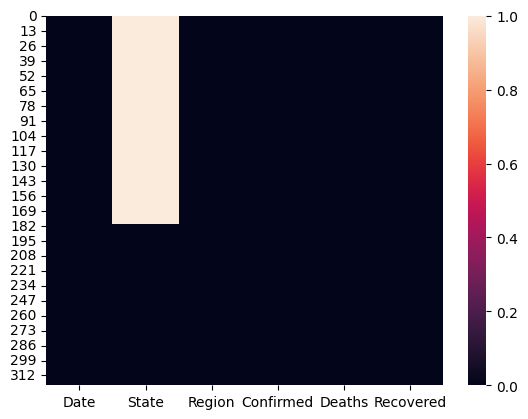

In [36]:
sns.heatmap(data.isnull())
plt.show()

**In which Region, maximum number of Confirmed cases were recorded ?**

In [37]:
data.groupby('Region').Confirmed.sum().sort_values(ascending = False).head(20)

,Confirmed
Region,
US,1039909
Spain,236899
Italy,203591
France,166543
UK,166441
Germany,161539
Turkey,117589
Russia,99399
Iran,93657


**How many Confirmed , Deaths & Recovered cases were reported from India till 29 April 2020 ?**

In [38]:
data[data.Region == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for India
india_data = data[data['Region'] == 'India']

# Prepare data for plotting
india_cases = india_data[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
india_cases.columns = ['Case Type', 'Count']


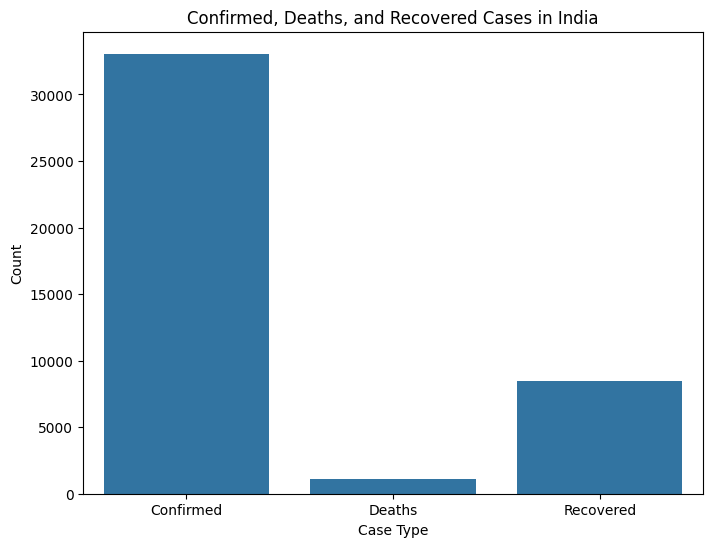

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Case Type', y='Count', data=india_cases)
plt.title('Confirmed, Deaths, and Recovered Cases in India')
plt.xlabel('Case Type')
plt.ylabel('Count')
plt.show()

## Exploring data distribution

Analysed the distribution of Confirmed, Deaths, and Recovered cases across different regions and states.


In [41]:
region_summary = data.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
state_summary = data.groupby('State')[['Confirmed', 'Deaths', 'Recovered']].sum()

print("Top 10 Regions with Highest Confirmed Cases:")
display(region_summary.sort_values(by='Confirmed', ascending=False).head(10))

print("\nTop 10 States with Highest Confirmed Cases:")
display(state_summary.sort_values(by='Confirmed', ascending=False).head(10))

Top 10 Regions with Highest Confirmed Cases:


,Confirmed,Deaths,Recovered
Region,,,
US,1039909,60967,120720
Spain,236899,24275,132929
Italy,203591,27682,71252
France,166543,24121,49118
UK,166441,26166,857
Germany,161539,6467,120400
Turkey,117589,3081,44040
Russia,99399,972,10286
Iran,93657,5957,73791



Top 10 States with Highest Confirmed Cases:


,Confirmed,Deaths,Recovered
State,,,
New York,299691,23477,0
New Jersey,116365,6771,0
Hubei,68128,4512,63616
Massachusetts,60265,3405,0
Illinois,50358,2215,0
California,48747,1946,0
Pennsylvania,46327,2373,0
Michigan,40399,3670,0
Florida,33193,1218,0


 Relationship between Confirmed, Deaths and Recovered cases.


In [42]:
correlation_matrix = data[['Confirmed', 'Deaths', 'Recovered']].corr()
display(correlation_matrix)

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.907294,0.596008
Deaths,0.907294,1.000000,0.519295
Recovered,0.596008,0.519295,1.000000
